<a href="https://colab.research.google.com/github/benz6114/6620412006_DADS-7203_Word-Embedding/blob/main/6620412006_NLP_Word_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import nltk
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [8]:
import pandas as pd
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


In [9]:
data = pd.read_csv('https://raw.githubusercontent.com/benz6114/6620412006_DADS-7203_Word-Embedding/refs/heads/main/TaylorSwift.csv')
df = data.dropna(subset=['Lyric'])
df.head()

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,1,Taylor Swift,A Monster In My Closet!,NaN,2000,1/1/2000,there's a monster in my closet and i don't kno...
1,2,Taylor Swift,​epiphany (the long pond studio sessions),folklore: the long pond studio sessions (from ...,2002,25/11/2002,keep your helmet keep your life son just a fle...
2,3,Taylor Swift,Dark Blue Tennessee,2004-2005 Demo CD,2004,1/1/2004,he said i got me a nice new apartment in the c...
3,4,Taylor Swift,All Night Diner,Unreleased Songs,2005,1/1/2005,i wake up i stretch out i wonder what you're d...
4,5,Taylor Swift,Teardrops on My Guitar,Taylor Swift,2006,24/10/2006,drew looks at me i fake a smile so he won't se...


In [10]:
df1 = df[df['Year'] <= 2015].reset_index(drop=True)
group1 = df1['Lyric']
df2 = df[df['Year'] > 2015].reset_index(drop=True)
group2 = df2['Lyric']

# **Group1: <= 2015**



In [11]:
stop_words=set(stopwords.words("english"))
print(stop_words)
print(len(stop_words))

{"he's", 'into', 'more', "it'll", "they've", 'own', 'can', "isn't", 'some', "he'd", 'both', "we're", 've', 'under', 'had', 'against', 'having', "she'll", 'each', 'while', "hadn't", 'no', 'in', 'below', 'again', 'i', 'ours', 'aren', "didn't", 'than', 'did', 'up', "we'll", 'which', "hasn't", 'themselves', 'a', 'because', "shan't", "you'd", 'couldn', "he'll", 'isn', 'won', 'not', 'during', 'were', "we'd", 'wasn', 'we', 'yours', 'being', 're', 'have', 'doing', 'needn', "won't", 'or', "aren't", 'your', 'himself', 'to', 'is', 'of', "i'm", 'her', "she's", 'other', "that'll", 'was', 'off', "don't", "couldn't", 'mightn', 'y', 'should', "needn't", 'at', 'by', 'you', 'didn', 'but', "they'll", "haven't", 't', 'those', 'too', 'o', 'there', 'what', 'theirs', 'when', 'these', "we've", 'as', 'doesn', 'his', 'm', 'until', "mustn't", 'me', 'only', 'am', 'that', 'from', 'for', 'hasn', 'here', 'ain', 'an', 'between', 'out', 'so', "wasn't", 'where', 'on', 'whom', 'yourself', 'ourselves', "they'd", "you've"

**Select columns and  custom corpus for gensim modeling Group1**

In [12]:
# Store them in the pandas dataframe, resetting the index for df1
group1_clean = pd.DataFrame(group1.reset_index(drop=True))  # reset index to avoid potential conflicts
group1_clean = group1_clean.rename(columns={0: 'Lyric'}) # Rename the '0' column to 'Lyric'
print(group1_clean)

stop_words=set(stopwords.words("english"))
sent1 = []  # Initialize an empty list to store results

for row in group1_clean['Lyric']:
    words = row.split(' ')
    filtered_words = []  # Initialize an empty list for each row's filtered words
    for word in words:
        if word not in stop_words:
            filtered_words.append(word)
    sent1.append(filtered_words)  # Append the filtered words for the current row to the result list

# Display the first 3 rows of the result
sent1[:3]

                                                 Lyric
0    there's a monster in my closet and i don't kno...
1    keep your helmet keep your life son just a fle...
2    he said i got me a nice new apartment in the c...
3    i wake up i stretch out i wonder what you're d...
4    drew looks at me i fake a smile so he won't se...
..                                                 ...
179  i want to thank the fans for the last 0 years ...
180  enchanted this night is sparkling don't you le...
181  5 may 05 las vegas  ed sheeran  tenerife sea  ...
182  he said let's get out of this town drive out o...
183  i write this to explain why ill be holding bac...

[184 rows x 1 columns]


[["there's",
  'monster',
  'closet',
  'know',
  'ever',
  'seen',
  'ever',
  'pounced',
  'wonder',
  'looks',
  'like',
  'purple',
  'red',
  'eyes',
  'wonder',
  'likes',
  'eat',
  'size',
  'tonight',
  'gonna',
  'catch',
  'set',
  'real',
  'big',
  'trap',
  'train',
  'really',
  'well',
  'answer',
  'clap',
  '',
  'looked',
  'closet',
  'nothing',
  'stuff',
  'know',
  "monster's",
  'heard',
  'huff',
  'puff',
  'could',
  'wants',
  'eat',
  'maybe',
  'favorite',
  'tray',
  'comes',
  'get',
  'scream',
  'loudly',
  'go',
  'away',
  'nice',
  'name',
  'happy',
  'bad',
  'name',
  'grouch',
  'suspect',
  'leaving',
  '',
  'kick'],
 ['keep',
  'helmet',
  'keep',
  'life',
  'son',
  'flesh',
  'wound',
  "here's",
  'rifle',
  'crawling',
  'beaches',
  'sir',
  'think',
  'bleeding',
  'things',
  "can't",
  'speak',
  '',
  '',
  'serve',
  'fall',
  'watch',
  'breathe',
  'watch',
  'breathing',
  '',
  '',
  'something',
  'med',
  'school',
  'cover',

**Word2Vec Group1**

In [13]:
model1 = Word2Vec(sent1, min_count=1,workers=3, window =3, sg = 1) #sg = 1 is skip-gram ,sg= 0 is CBOW (default)
print(model1)

Word2Vec<vocab=3448, vector_size=100, alpha=0.025>


In [14]:
model1.wv.most_similar('love')[:5]

[('story', 0.9606976509094238),
 ('clean', 0.9588043093681335),
 ('finally', 0.9581140279769897),
 ('hallelujah', 0.9574912190437317),
 ('like', 0.9573455452919006)]

In [15]:
model1.wv.most_similar('break')[:5]

[('heart', 0.9787551164627075),
 ('blink', 0.9760266542434692),
 ('perfectly', 0.9756084680557251),
 ('enough', 0.9717975854873657),
 ('straw', 0.9686322212219238)]

In [16]:
model1.wv.most_similar('perfect')[:5]

[('playing', 0.9984465837478638),
 ('use', 0.9983937740325928),
 ('girls', 0.9983682632446289),
 ('crazy', 0.9983490109443665),
 ('strange', 0.9983012080192566)]

In [17]:
model1.wv.most_similar('night')[:5]

[('sparkling', 0.9902254939079285),
 ('style', 0.9898383021354675),
 ('december', 0.9888690114021301),
 ('free', 0.9885590672492981),
 ('woah', 0.9884979128837585)]

In [18]:
model1.wv.most_similar('heart')[:5]

[('win', 0.9845006465911865),
 ('perfectly', 0.9824125170707703),
 ('woah', 0.9819788336753845),
 ('herd', 0.9808166027069092),
 ('flawless', 0.9806323647499084)]

**Plot Data Group1**

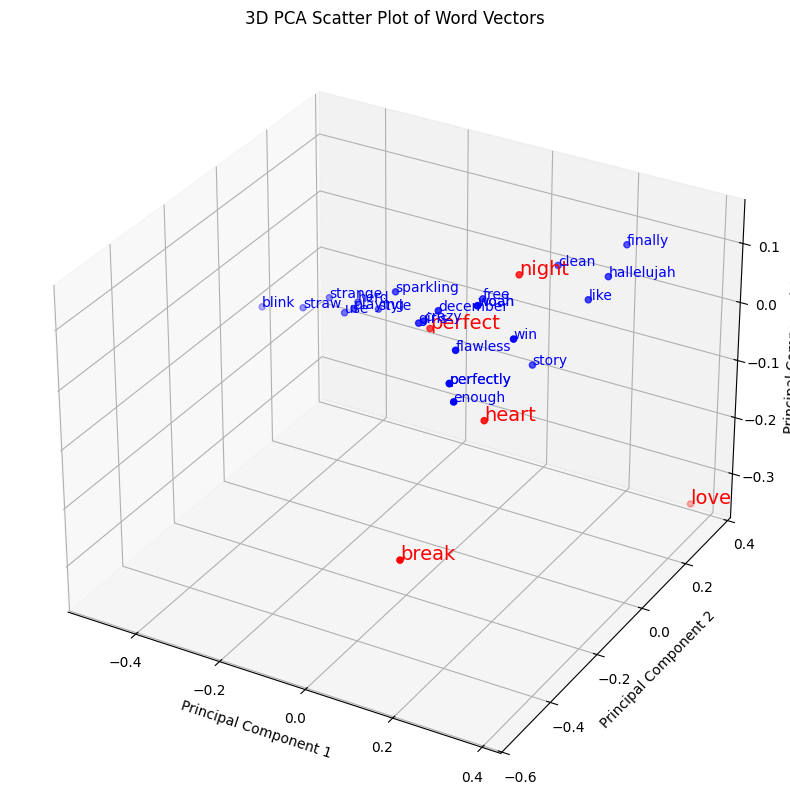

In [19]:
# Assume model1.wv is a pre-trained Word2Vec model
# Get the top 5 similar words for each main word using Word2Vec's most_similar method
group1_similar_love = [word for word, _ in model1.wv.most_similar('love')[:5]]
group1_similar_break = [word for word, _ in model1.wv.most_similar('break')[:5]]
group1_similar_perfect = [word for word, _ in model1.wv.most_similar('perfect')[:5]]
group1_similar_night = [word for word, _ in model1.wv.most_similar('night')[:5]]
group1_similar_heart = [word for word, _ in model1.wv.most_similar('heart')[:5]]

# Define the main words we are focusing on
main_words = ['love', 'break', 'perfect', 'night', 'heart']

# Combine all similar words into a single list
similar_words = group1_similar_love + group1_similar_break + group1_similar_perfect + group1_similar_night + group1_similar_heart

# Create a unified list of all unique words, prioritizing main_words
all_words = main_words + [word for word in similar_words if word not in main_words]

# Create a matrix of word vectors for all unique words
word_matrix = np.array([model1.wv[word] for word in all_words])

# Perform PCA to reduce dimensionality to 3D (instead of 2D)
pca = PCA(n_components=3)  # Change to 3 components
# Fit and transform the word_matrix to get 3D coordinates
pca_result = pca.fit_transform(word_matrix)

# Get indices for main_words and similar_words in the all_words list
main_indices = [all_words.index(word) for word in main_words]
# - similar_indices: positions of all other words (not in main_words)
similar_indices = [i for i in range(len(all_words)) if i not in main_indices]

# Create the 3D plot with a specified figure size
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')  # Add 3D axes

# Plot main_words in red
ax.scatter(pca_result[main_indices, 0], pca_result[main_indices, 1], pca_result[main_indices, 2],
           marker='o', color='red')
# Annotate each main word with its label
for i, word in enumerate(main_words):
    ax.text(pca_result[main_indices[i], 0], pca_result[main_indices[i], 1], pca_result[main_indices[i], 2],
            word, color='red', fontsize=14)

# Plot similar_words in blue
ax.scatter(pca_result[similar_indices, 0], pca_result[similar_indices, 1], pca_result[similar_indices, 2],
           marker='o', color='blue')
# Annotate each similar word with its label
for i, word in enumerate([all_words[i] for i in similar_indices]):
    ax.text(pca_result[similar_indices[i], 0], pca_result[similar_indices[i], 1], pca_result[similar_indices[i], 2],
            word, color='blue')

# Set plot details
ax.set_xlabel("Principal Component 1")  # Label for x-axis
ax.set_ylabel("Principal Component 2")  # Label for y-axis
ax.set_zlabel("Principal Component 3")  # Label for z-axis
ax.set_title("3D PCA Scatter Plot of Word Vectors")  # Title of the plot

# Display the plot
plt.show()

# **Group2: >2015**

**Select columns and  custom corpus for gensim modeling Group2**

In [20]:
# Store them in the pandas dataframe, resetting the index for df2
group2_clean = pd.DataFrame(group2.reset_index(drop=True))  # reset index to avoid potential conflicts
group2_clean = group2_clean.rename(columns={0: 'Lyric'}) # Rename the '0' column to 'Lyric'
print(group2_clean)

stop_words=set(stopwords.words("english"))
sent2 = []  # Initialize an empty list to store results

for row in group2_clean['Lyric']:
    words = row.split(' ')
    filtered_words = []  # Initialize an empty list for each row's filtered words
    for word in words:
        if word not in stop_words:
            filtered_words.append(word)
    sent2.append(filtered_words)  # Append the filtered words for the current row to the result list

# Display the first 3 rows of the result
sent2[:3]

                                                 Lyric
0    baby this is what you came for lightning strik...
1    search  where is the video of kanye telling me...
2    i don't like your little games don't like your...
3    taylor swift  future i wanna be your end game ...
4    knew he was a killer first time that i saw him...
..                                                 ...
146  spoken  it's jingleball theres santa hats ever...
147  to put it plainly we just couldnt stop writing...
148  zwrotka  siedzę i patrzę jak czytasz z głową p...
149  friends break up friends get married strangers...
150  when the dinner is cold and the chatter gets o...

[151 rows x 1 columns]


[['baby',
  'came',
  'lightning',
  'strikes',
  'every',
  'time',
  'moves',
  "everybody's",
  'watching',
  'looking',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  '',
  '',
  'baby',
  'came',
  'lightning',
  'strikes',
  'every',
  'time',
  'moves',
  "everybody's",
  'watching',
  'looking',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  '',
  'verse',
  'go',
  'fast',
  'game',
  'play',
  'knows',
  'gotta',
  'way',
  'say',
  'nothing',
  'need',
  'say',
  'place',
  'leave',
  '',
  '',
  'baby',
  'came',
  'lightning',
  'strikes',
  'every',
  'time',
  'moves',
  "everybody's",
  'watching',
  'looking',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh'],
 ['search',
  '',
  'video',
  'kanye',
  'telling',
  'going',
  'call',
  'bitch',
  'song',
  'exist',
  'never',
 

**Word2Vec Group2**

In [21]:
model2 = Word2Vec(sent2, min_count=1,workers=3, window =3, sg = 1) #sg = 1 is skip-gram ,sg= 0 is CBOW (default)
print(model2)

Word2Vec<vocab=4762, vector_size=100, alpha=0.025>


In [22]:
model2.wv.most_similar('love')[:5]

[("ain't", 0.9934827089309692),
 ('talk', 0.989193320274353),
 ("'em", 0.9884797930717468),
 ('team', 0.9884270429611206),
 ('guess', 0.9880639314651489)]

In [23]:
model2.wv.most_similar('break')[:5]

[('dance', 0.9969508051872253),
 ('house', 0.996806263923645),
 ('audience', 0.9967537522315979),
 ('care', 0.9966424107551575),
 ('ladies', 0.9964883327484131)]

In [24]:
model2.wv.most_similar('perfect')[:5]

[('eyes', 0.9969955682754517),
 ('living', 0.9969341158866882),
 ('god', 0.9967906475067139),
 ('kingdom', 0.9967756271362305),
 ('mess', 0.9967664480209351)]

In [25]:
model2.wv.most_similar('night')[:5]

[('golden', 0.9871662855148315),
 ('dreams', 0.9852600693702698),
 ('gotta', 0.9850971102714539),
 ('wide', 0.9849340319633484),
 ('middle', 0.9841398596763611)]

In [26]:
model2.wv.most_similar('heart')[:5]

[('blue', 0.997602105140686),
 ('saying', 0.9975545406341553),
 ('king', 0.9974896907806396),
 ('heaven', 0.9974766373634338),
 ('artists', 0.997431218624115)]

**Plot Data Group2**

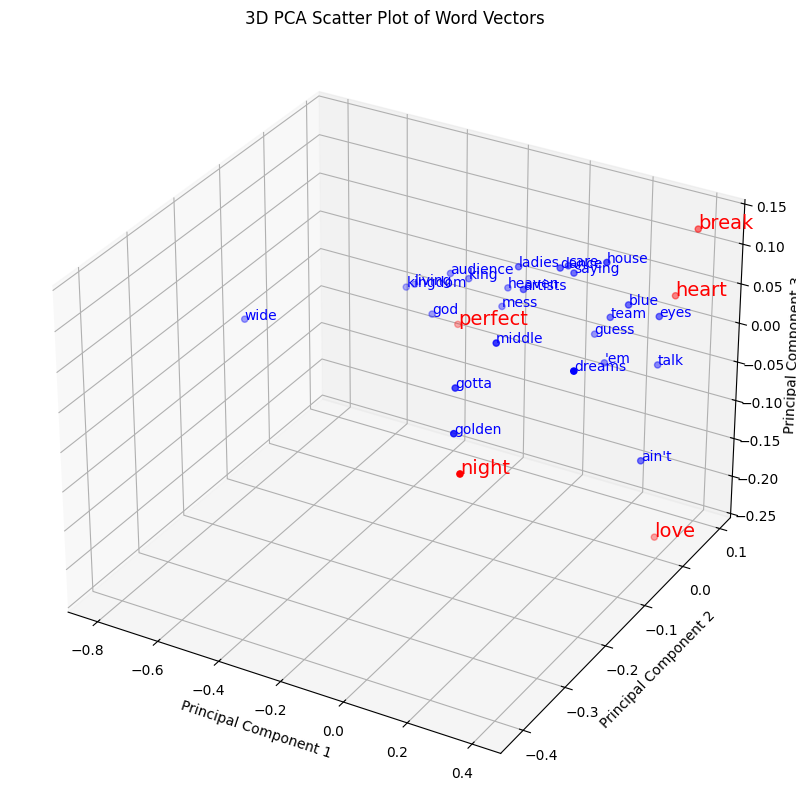

In [27]:
# Assume model2.wv is a pre-trained Word2Vec model
# Get the top 5 similar words for each main word using Word2Vec's most_similar method
group2_similar_love = [word for word, _ in model2.wv.most_similar('love')[:5]]
group2_similar_break = [word for word, _ in model2.wv.most_similar('break')[:5]]
group2_similar_perfect = [word for word, _ in model2.wv.most_similar('perfect')[:5]]
group2_similar_night = [word for word, _ in model2.wv.most_similar('night')[:5]]
group2_similar_heart = [word for word, _ in model2.wv.most_similar('heart')[:5]]

# Define the main words we are focusing on
main_words2 = ['love', 'break', 'perfect', 'night', 'heart']

# Combine all similar words into a single list
similar_words2 = group2_similar_love + group2_similar_break + group2_similar_perfect + group2_similar_night + group2_similar_heart

# Create a unified list of all unique words, prioritizing main_words
all_words2 = main_words2 + [word for word in similar_words2 if word not in main_words2]

# Create a matrix of word vectors for all unique words
word_matrix2 = np.array([model2.wv[word] for word in all_words2])

# Perform PCA to reduce dimensionality to 3D (instead of 2D)
pca2 = PCA(n_components=3)  # Change to 3 components
# Fit and transform the word_matrix to get 3D coordinates
pca_result2 = pca2.fit_transform(word_matrix2)

# Get indices for main_words and similar_words in the all_words list
main_indices2 = [all_words2.index(word) for word in main_words2]  # Fixed 'all_words' to 'all_words2'
similar_indices2 = [i for i in range(len(all_words2)) if i not in main_indices2]

# Create the 3D plot with a specified figure size
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')  # Add 3D axes

# Plot main_words in red
ax.scatter(pca_result2[main_indices2, 0], pca_result2[main_indices2, 1], pca_result2[main_indices2, 2],
           marker='o', color='red')
# Annotate each main word with its label
for i, word in enumerate(main_words2):
    ax.text(pca_result2[main_indices2[i], 0], pca_result2[main_indices2[i], 1], pca_result2[main_indices2[i], 2],
            word, color='red', fontsize=14)

# Plot similar_words in blue
ax.scatter(pca_result2[similar_indices2, 0], pca_result2[similar_indices2, 1], pca_result2[similar_indices2, 2],
           marker='o', color='blue')
# Annotate each similar word with its label
for i, word in enumerate([all_words2[i] for i in similar_indices2]):
    ax.text(pca_result2[similar_indices2[i], 0], pca_result2[similar_indices2[i], 1], pca_result2[similar_indices2[i], 2],
            word, color='blue')

# Set plot details
ax.set_xlabel("Principal Component 1")  # Label for x-axis
ax.set_ylabel("Principal Component 2")  # Label for y-axis
ax.set_zlabel("Principal Component 3")  # Label for z-axis
ax.set_title("3D PCA Scatter Plot of Word Vectors")  # Title of the plot

# Display the plot
plt.show()